In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

In [21]:
file_path = 'koliodata.xlsx'
df = pd.read_excel(file_path)


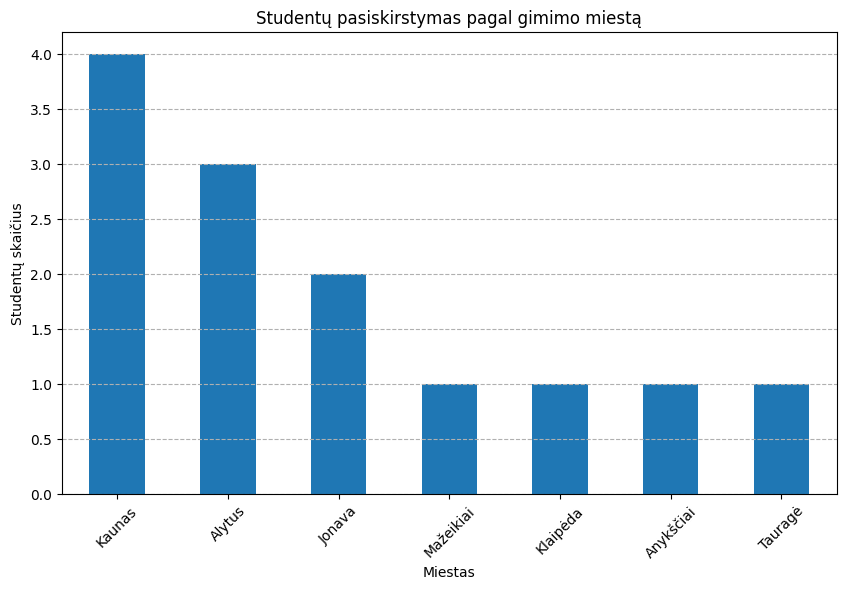

In [10]:
city_counts = df['BirthPlace'].value_counts()


plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Studentų pasiskirstymas pagal gimimo miestą')
plt.xlabel('Miestas')
plt.ylabel('Studentų skaičius')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

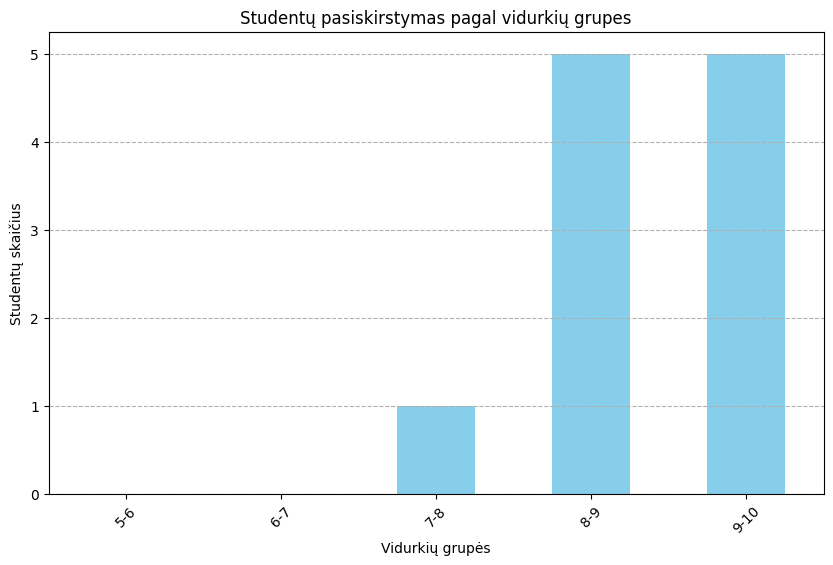

In [15]:
# Sudarome grupes
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6', '6-7', '7-8', '8-9', '9-10']
df['GradeGroup'] = pd.cut(df['AverageGrade'], bins=bins, labels=labels, right=False)

# Skaičiuojame, kiek studentų yra kiekvienoje grupėje
group_counts = df['GradeGroup'].value_counts().sort_index()

# Vizualizacija
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Vidurkių grupės')
plt.ylabel('Studentų skaičius')
plt.title('Studentų pasiskirstymas pagal vidurkių grupes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

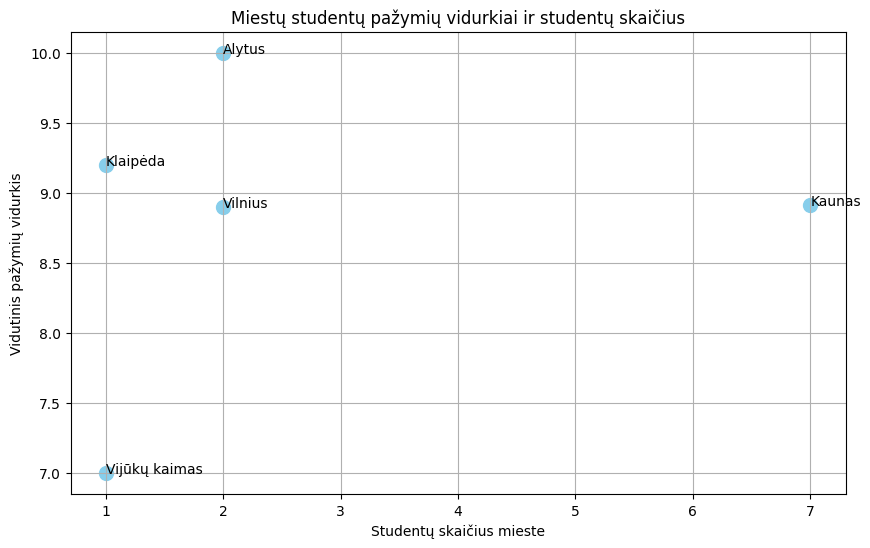

In [17]:
city_stats = df.groupby('LivingPlace').agg(
    AverageGrade=('AverageGrade', 'mean'),
    StudentCount=('Name', 'count')
).reset_index()

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.scatter(city_stats['StudentCount'], city_stats['AverageGrade'], color='skyblue', s=100)

# Pridedame miestų pavadinimus prie kiekvieno taško
for i, txt in enumerate(city_stats['LivingPlace']):
    plt.annotate(txt, (city_stats['StudentCount'][i], city_stats['AverageGrade'][i]))

plt.xlabel('Studentų skaičius mieste')
plt.ylabel('Vidutinis pažymių vidurkis')
plt.title('Miestų studentų pažymių vidurkiai ir studentų skaičius')
plt.grid(True)
plt.show()

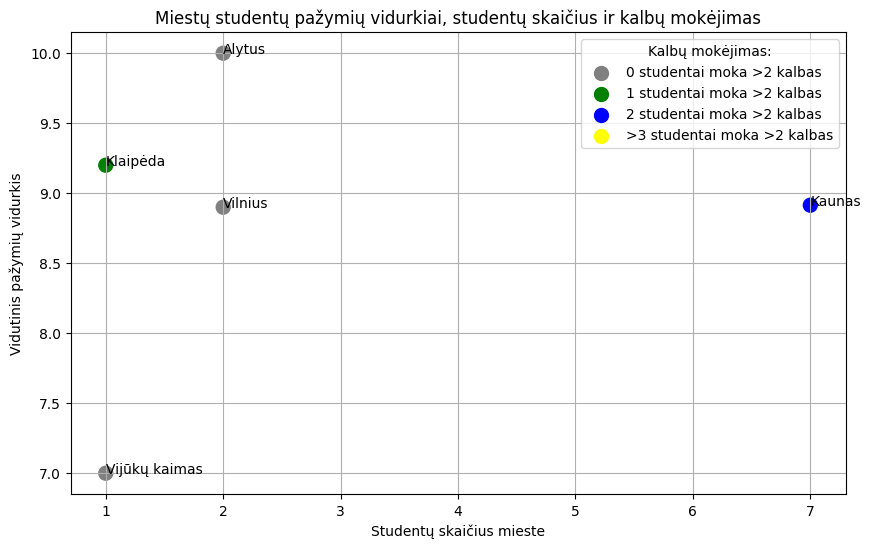

In [23]:
# Grupuojame duomenis pagal 'LivingPlace' ir skaičiuojame reikiamus agregatus
city_stats = df.groupby('LivingPlace').agg(
    AverageGrade=('AverageGrade', 'mean'),
    StudentCount=('Name', 'count'),
    MoreThanTwoLanguages=('Language cnt', lambda x: (x > 2).sum())  # Skaičiuojame, kiek yra studentų, mokančių daugiau nei 2 kalbas
).reset_index()

# Apskaičiuojame spalvas pagal 'MoreThanTwoLanguages' reikšmes
colors = []
for row in city_stats.itertuples():
    if row.MoreThanTwoLanguages > 3:
        colors.append('yellow')  # Daugiau nei 3 studentai moka daugiau nei 2 kalbas
    elif row.MoreThanTwoLanguages == 2:
        colors.append('blue')  # 2 studentai moka daugiau nei 2 kalbas
    elif row.MoreThanTwoLanguages == 1:
        colors.append('green')  # 1 studentas moka daugiau nei 2 kalbas
    else:
        colors.append('grey')  # Nėra studentų, mokančių daugiau nei 2 kalbas

# Vizualizacija su legenda
plt.figure(figsize=(10, 6))
for i, color in enumerate(['grey', 'green', 'blue', 'yellow']):
    plt.scatter([], [], color=color, label=f'{["0", "1", "2", ">3"][i]} studentai moka >2 kalbas', s=100)

plt.scatter(city_stats['StudentCount'], city_stats['AverageGrade'], color=colors, s=100)

# Pridedame miestų pavadinimus
for i, txt in enumerate(city_stats['LivingPlace']):
    plt.annotate(txt, (city_stats['StudentCount'][i], city_stats['AverageGrade'][i]))

plt.xlabel('Studentų skaičius mieste')
plt.ylabel('Vidutinis pažymių vidurkis')
plt.title('Miestų studentų pažymių vidurkiai, studentų skaičius ir kalbų mokėjimas')
plt.legend(title='Kalbų mokėjimas:')
plt.grid(True)
plt.show()